# Visualising the Jet clusters
### Need: Aggregation files and the Jet_cluster.json exported file

This jupyter notebook is made to visualise the exported jet clusters.   
We use some functions written for this dataset to visualise the jet clusters evolution over the Zooniverse subjects.   
You can change the Jet_cluster chosen by changing the date or properties like maximum height

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from BoxTheJets.aggregation import json_import_list, json_export_list
import os
plt.style.use('default')
%matplotlib inline

In [ ]:
from BoxTheJets.aggregation import Aggregator, get_subject_image
from BoxTheJets.aggregation import SOL

aggregator = Aggregator('BoxTheJets/reductions/point_reducer_hdbscan_box_the_jets.csv', 
                        'BoxTheJets/reductions/shape_reducer_dbscan_box_the_jets.csv')
aggregator.load_extractor_data('BoxTheJets/extracts/point_extractor_by_frame_box_the_jets.csv',
                               'BoxTheJets/extracts/shape_extractor_rotateRectangle_box_the_jets.csv')
sol = SOL('SOL_Tc_stats.csv', aggregator)

In [ ]:
#Loading in the class functions
Jet_clusters=json_import_list('BoxTheJets/exports/Jet_clusters_3.0_2.0.json')
Cluster_SOL= np.array([Jet_clusters[i].SOL for i in range(len(Jet_clusters))],dtype=str)

#Load in the SOL statistics
SOL_small,SOL_subjects,filenames0,times,Num,start,end,notes=np.loadtxt('SOL_{}_stats.csv'.format('Tc'),delimiter=',',unpack=True,dtype=str)
Num=Num.astype(float)

In [ ]:
def find_index_date(day,dates):
    '''Find the index of Jet clusters that start on the input date 
    Input: yyyy-mm-dd
    Output: np.array with indices'''
    day_index=np.where(np.char.find(dates, day)>=0)[0]
    return day_index

In [ ]:
day='2011-12-11' #Pick a test date
day_index=find_index_date('2012-09-01',Cluster_date)
if len(day_index)>1:
    print(f'There are {len(day_index)} SOL events on that day. Change the number on the next line to view others.')
    
SOL_index=day_index[2] #Pick one to test
SOL_subjects=sol.get_subjects(SOL_small[SOL_index])

In [ ]:
#Search based on a property like maximum height
Max_Height = np.array([Jet_clusters[i].Max_Height for i in range(len(Jet_clusters))],dtype=str)

sol_index = np.where(max(Max_Height))[0]
SOL_subjects=sol.get_subjects(SOL_small[SOL_index])

Show the SOL event connected to the chosen Jet cluster. 
The agreement plot and the height over time will be shown for that SOL event. 

SOL2011-12-11T11:30:00L353C109


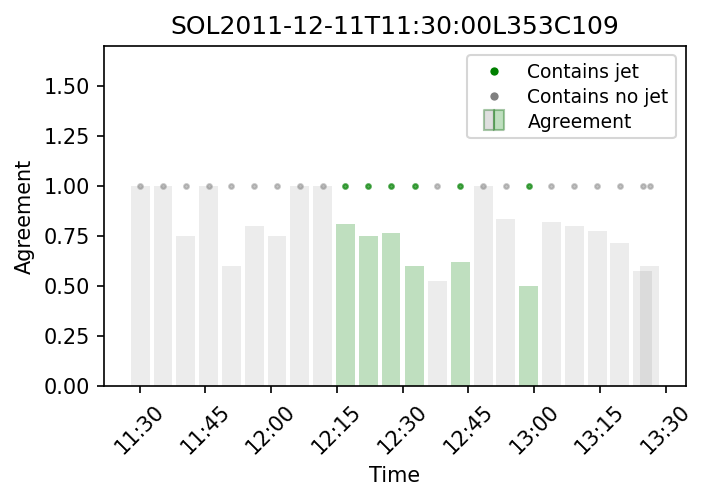

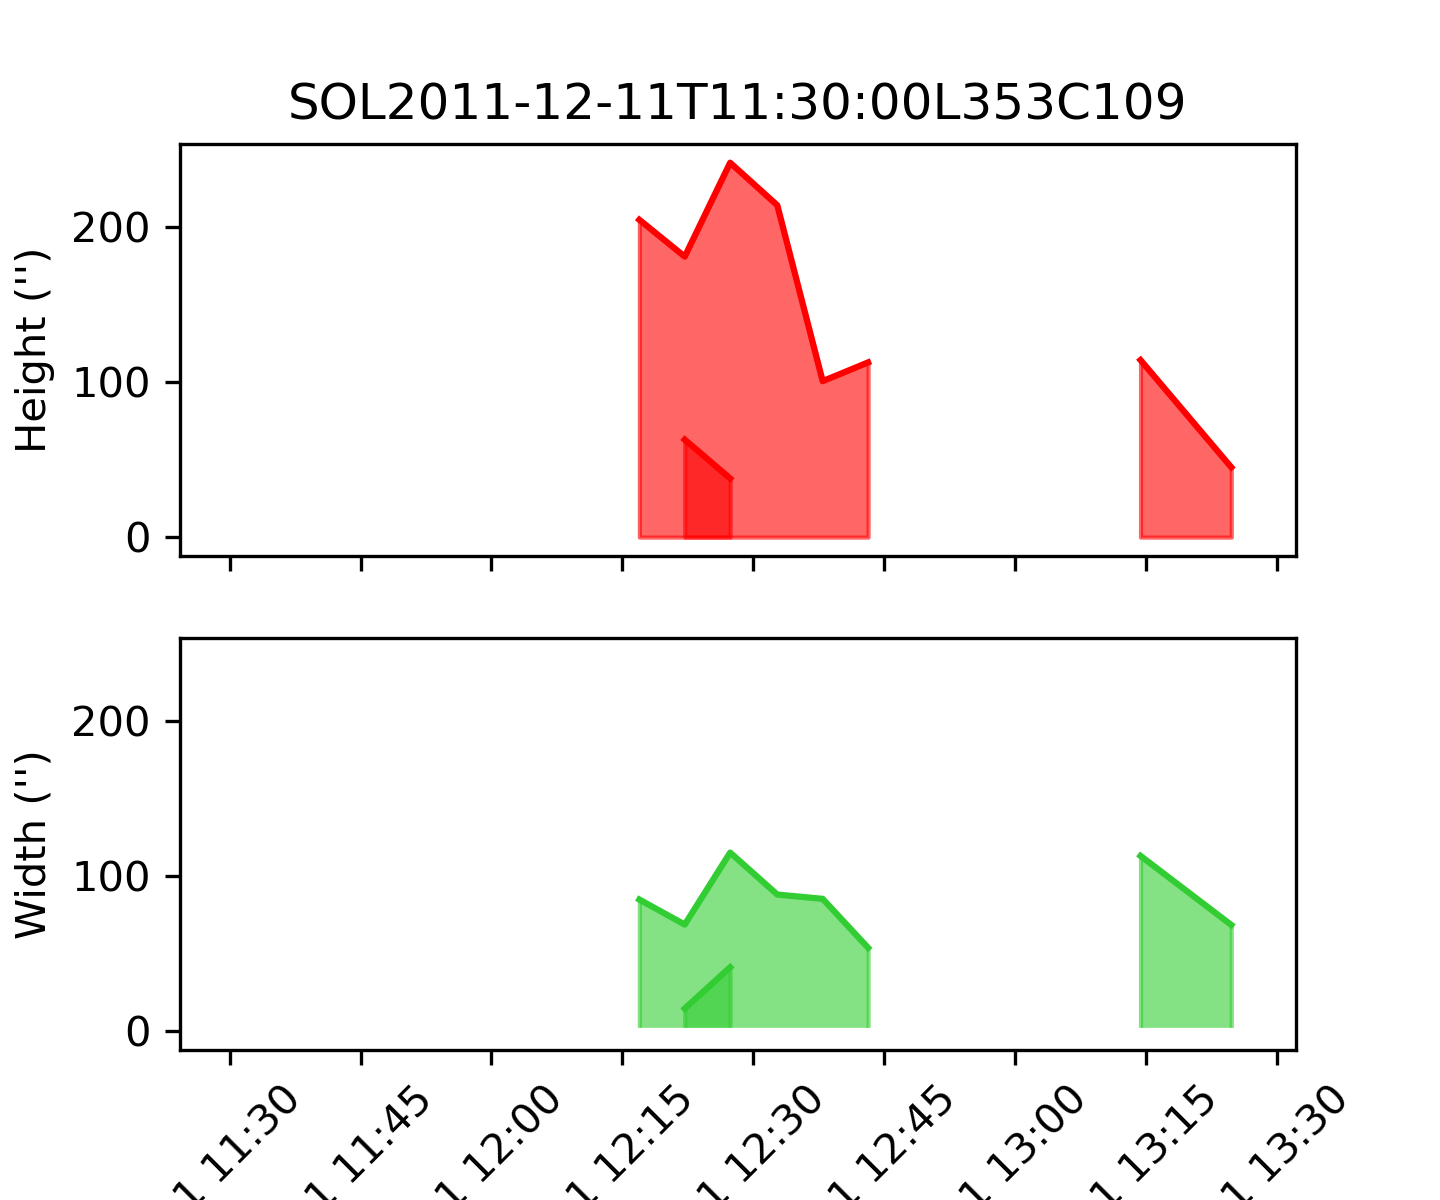

In [15]:
SOL_event=SOL_small[SOL_index]
print(SOL_event)
sol.event_bar_plot(SOL_event, task='Tc')  
sol.event_box_plot(SOL_event)



In [6]:
from IPython.display import Video
#Only works for foxsia computer can take some time to load
#Video(f"/Volumes/LaCie/Solarjet_Zooniversedata/files/generated/mp4/{SOL_event.replace(':','-')}.mp4",embed=True,width=600, height=300)

ID 157
Observed at 2011-12-11T12:16:56
Basepoint X -513 $\pm$ 9.074037334921842 $''$
Basepoint Y -305 $\pm$ 11.174457013902536 $''$
Latitude -18 $^{\circ}$
Longitude -33 $^{\circ}$
Maximum Height 241 $\pm$ [123.99903279 -81.91813294] $''$
Width 82 $\pm$ 18 $''$
Duration 31.8  minutes
Sigma 0.38
Velocity 280 km$s^{-1}$
70440809



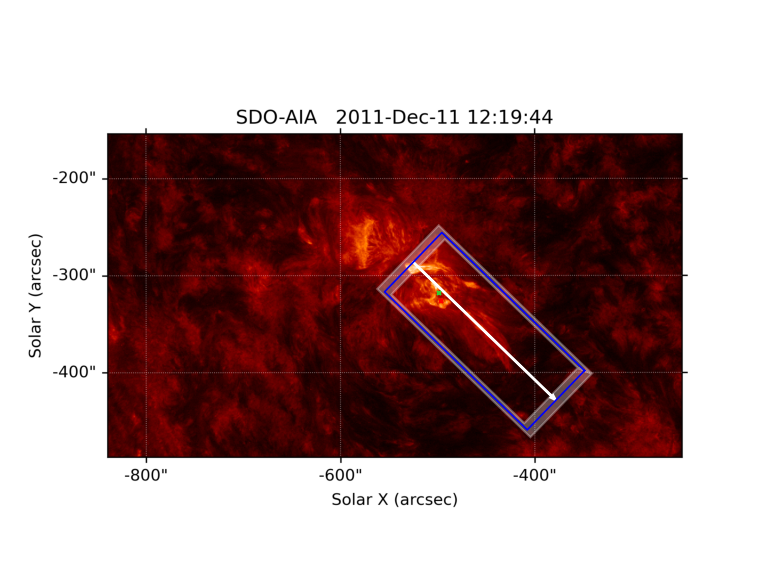

70440810



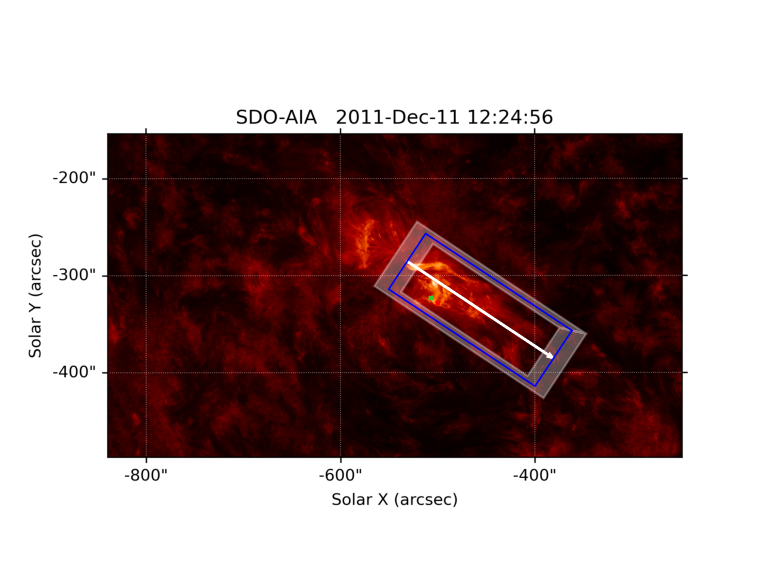

70440811



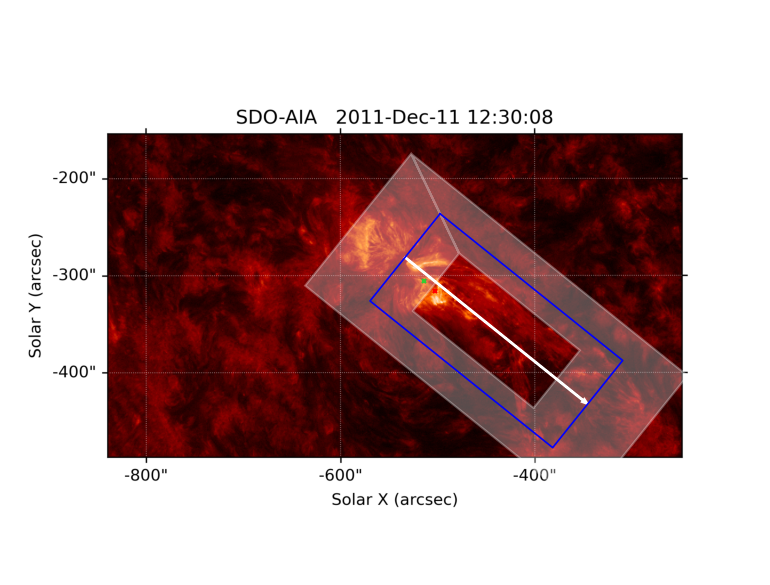

70440812



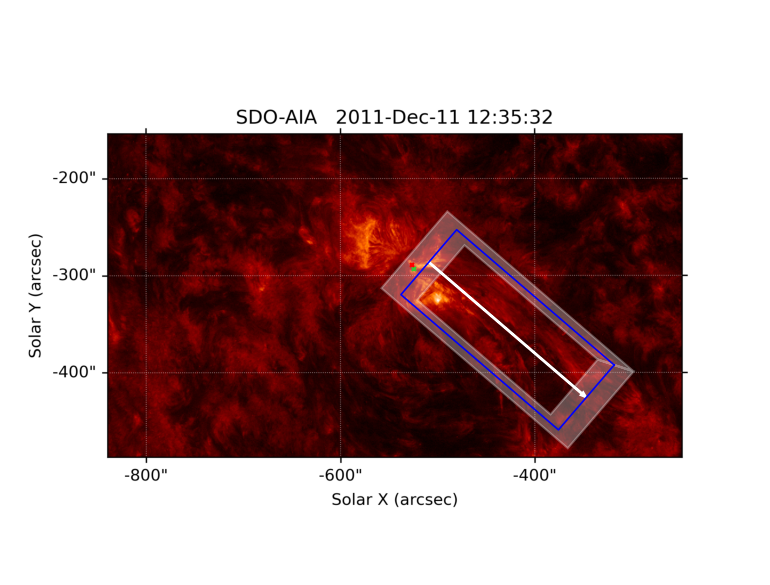

70440813



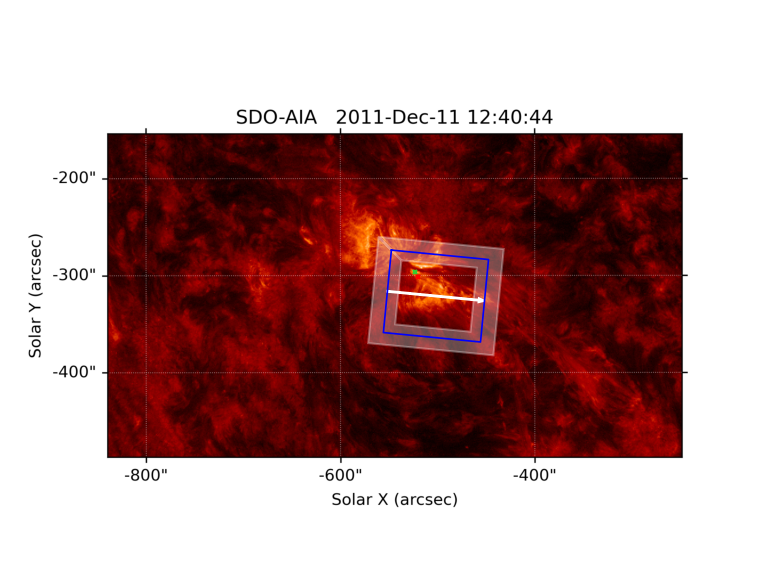

70440814



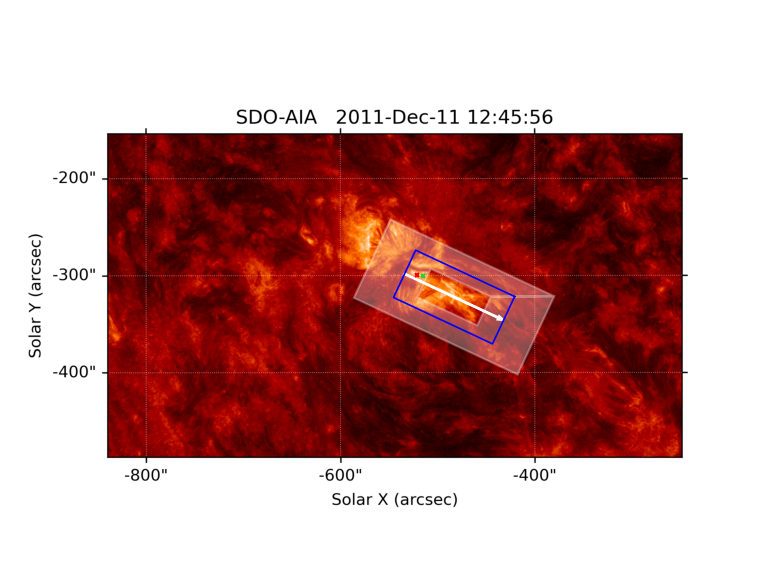

ID 158
Observed at 2011-12-11T12:22:08
Basepoint X -519 $\pm$ 6.601499999999987 $''$
Basepoint Y -298 $\pm$ 6.0490000000000075 $''$
Latitude -18 $^{\circ}$
Longitude -34 $^{\circ}$
Maximum Height 62 $\pm$ [ 37.55656733 -23.50704854] $''$
Width 27 $\pm$ 13 $''$
Duration 11.0  minutes
Sigma 0.52
Velocity nan
70440810



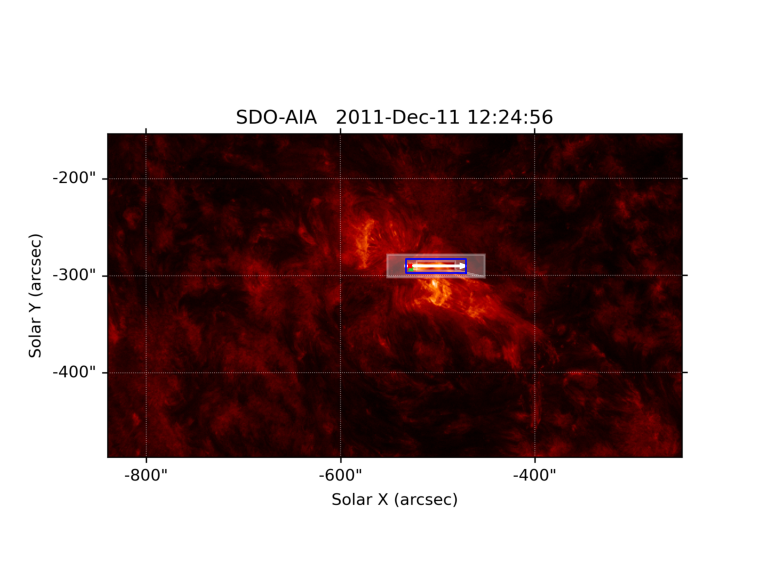

70440811



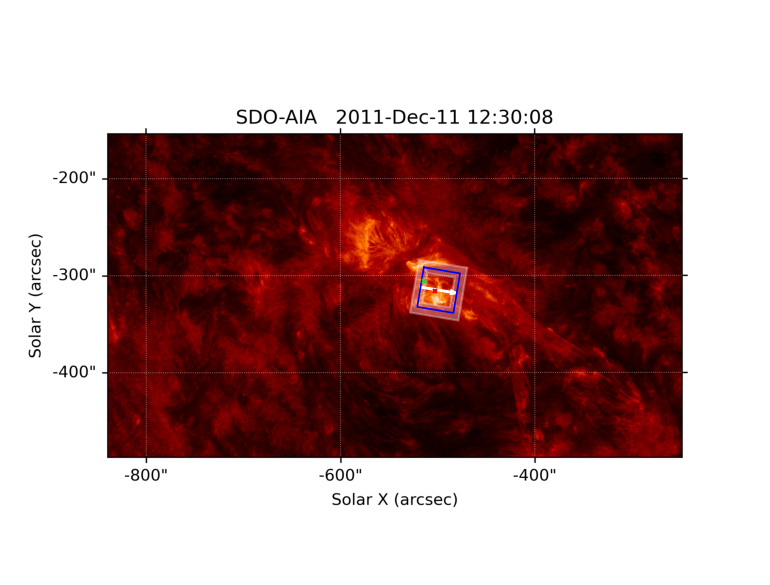

ID 159
Observed at 2011-12-11T13:14:20
Basepoint X -536 $\pm$ 40.5985 $''$
Basepoint Y -292 $\pm$ 1.538499999999999 $''$
Latitude -17 $^{\circ}$
Longitude -35 $^{\circ}$
Maximum Height 114 $\pm$ [ 31.81742251 -24.88231696] $''$
Width 90 $\pm$ 22 $''$
Duration 16.0  minutes
Sigma 0.53
Velocity nan
70440820



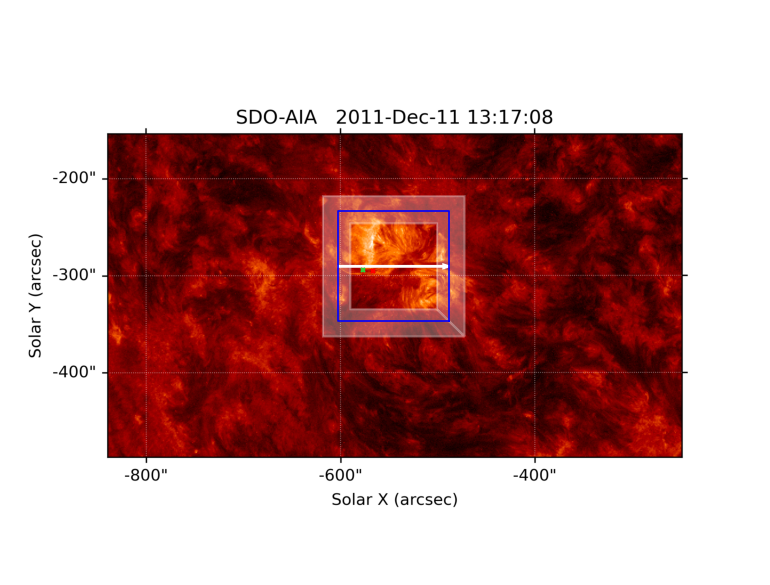

70440822



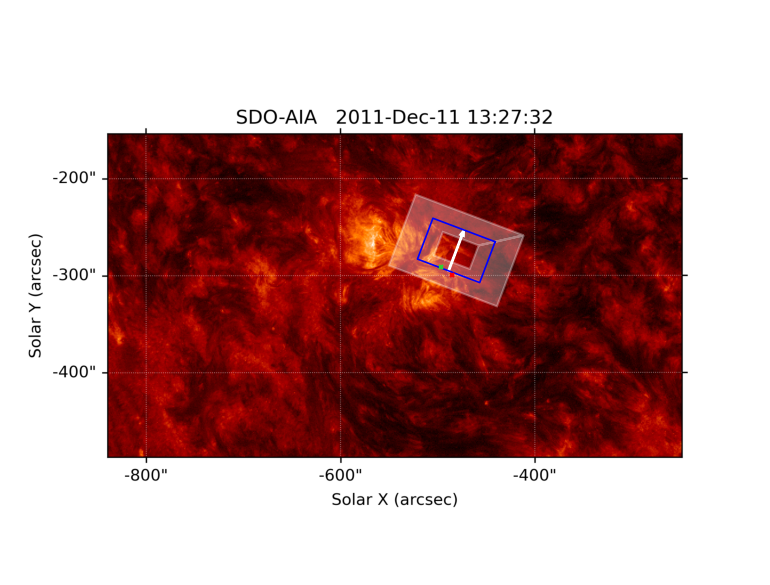

In [16]:
index=np.where(Cluster_SOL==SOL_event)[0]
SOL_jets=Jet_clusters[SOL_index]
for C in SOL_jets:
    print('ID',C.ID)
    print('Observed at',C.obs_time)
    print('Basepoint X',int(C.Bx),"$\pm$",(C.std_Bx),'$\'\'$')
    print('Basepoint Y',int(C.By),'$\pm$',(C.std_By),'$\'\'$')
    print('Latitude',int(C.Lat),'$^{\circ}$')
    print('Longitude',int(C.Lon),'$^{\circ}$')
    print('Maximum Height',int(C.Max_Height),'$\pm$',(C.std_maxH),'$\'\'$')
    print('Width',int(C.Width),'$\pm$',int(C.std_W),'$\'\'$')
    print('Duration',np.round(C.Duration,1),' minutes')
    print('Sigma',np.round(C.sigma,2))
    try:
        print('Velocity',int(C.Velocity*725), 'km$s^{-1}$')
    except:
        print('Velocity',C.Velocity)
        
    for jet in C.jets:
        print(jet.subject)
        print('')
        fig, ax = plt.subplots(1, 1, dpi=150)
        ax.imshow(get_subject_image(jet.subject))
        jet.plot(ax)
        ax.axis('off')
        plt.tight_layout()    
#        plt.savefig('myfolder/Jet_'+'_'+str(jet.subject)+'.pdf',dpi=300)
        plt.show()


You can also export the current Jet Clusters as new json or gif

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:02<00:00, 10.41s/it]
MovieWriter imagemagick unavailable; using Pillow instead.


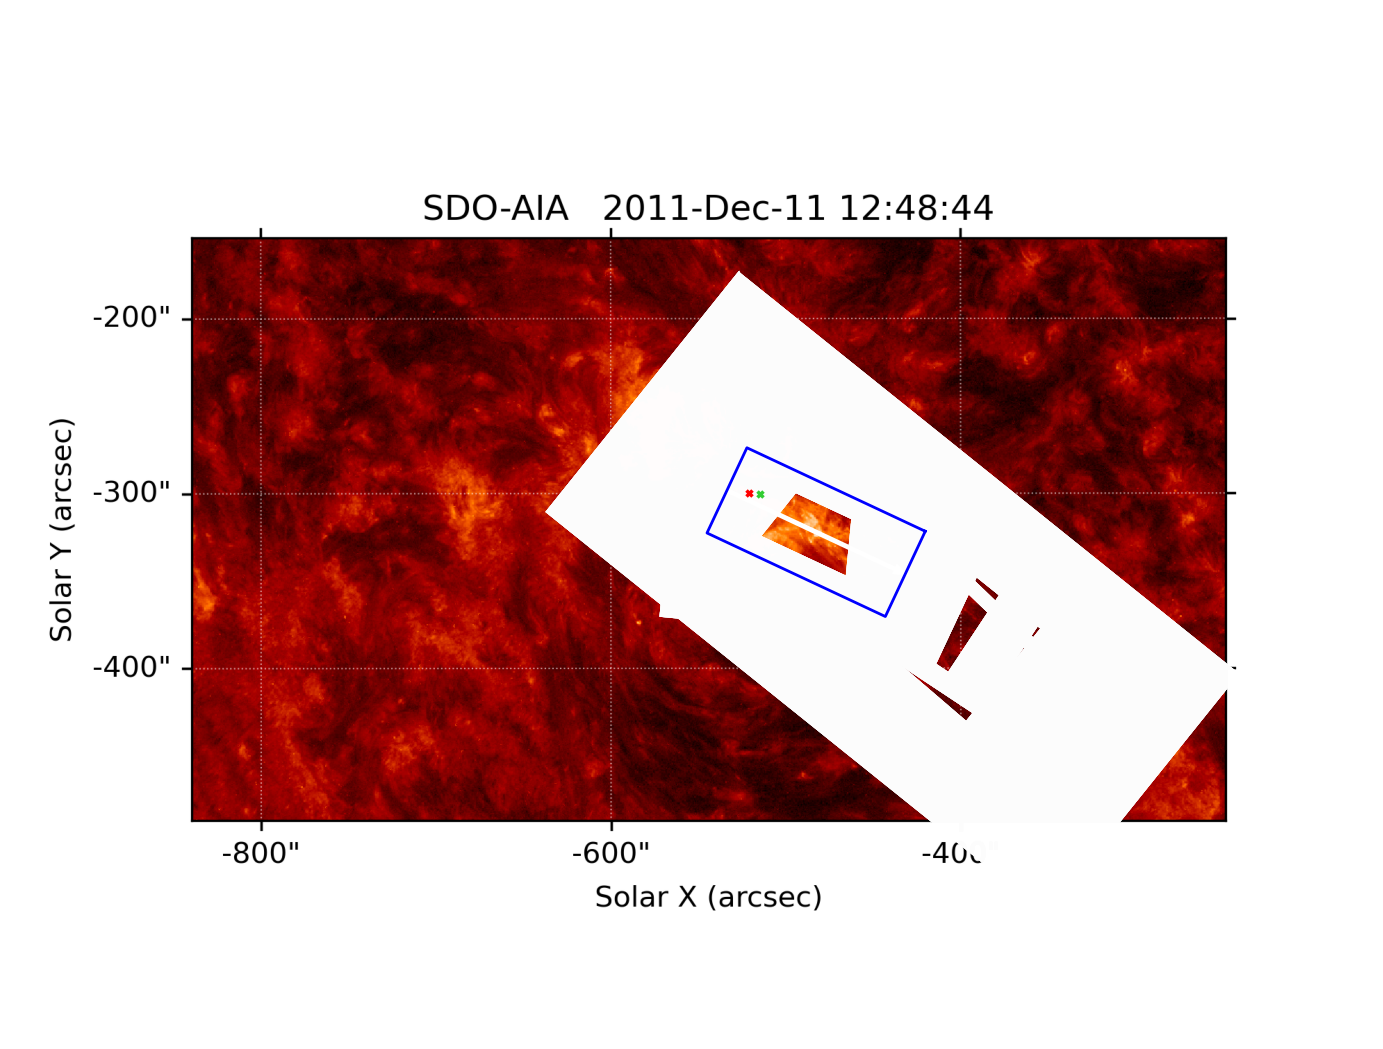

In [19]:
#Export a gif of a chosen jet cluster
Jet_clusters[SOL_index][0].create_gif('test.gif')
Jet_clusters[SOL_index].json_export('output_single')